In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
%matplotlib inline
from matplotlib.colors import LogNorm
import os
os.environ['PROJ_LIB'] = 'C:/Users/conta/Anaconda3/Lib/site-packages/mpl_toolkits/basemap'
from mpl_toolkits.basemap import Basemap
from pylab import rcParams

In [2]:
f = Dataset('Data/so2.nc','r')
print(f.groups)

{'PRODUCT': <class 'netCDF4._netCDF4.Group'>
group /PRODUCT:
    dimensions(sizes): scanline(357), ground_pixel(450), time(1), corner(4), layer(34)
    variables(dimensions): int32 scanline(scanline), int32 ground_pixel(ground_pixel), int32 time(time), int32 corner(corner), float32 latitude(time,scanline,ground_pixel), float32 longitude(time,scanline,ground_pixel), int32 delta_time(time,scanline,ground_pixel), <class 'str'> time_utc(time,scanline), uint8 qa_value(time,scanline,ground_pixel), float32 sulfurdioxide_total_vertical_column(time,scanline,ground_pixel), float32 sulfurdioxide_total_vertical_column_precision(time,scanline,ground_pixel), int32 layer(layer)
    groups: SUPPORT_DATA, 'METADATA': <class 'netCDF4._netCDF4.Group'>
group /METADATA:
    dimensions(sizes): 
    variables(dimensions): 
    groups: EOP_METADATA, ISO_METADATA, QA_STATISTICS, GRANULE_DESCRIPTION, ESA_METADATA}


In [3]:
print(f.groups['PRODUCT'])

<class 'netCDF4._netCDF4.Group'>
group /PRODUCT:
    dimensions(sizes): scanline(357), ground_pixel(450), time(1), corner(4), layer(34)
    variables(dimensions): int32 scanline(scanline), int32 ground_pixel(ground_pixel), int32 time(time), int32 corner(corner), float32 latitude(time,scanline,ground_pixel), float32 longitude(time,scanline,ground_pixel), int32 delta_time(time,scanline,ground_pixel), <class 'str'> time_utc(time,scanline), uint8 qa_value(time,scanline,ground_pixel), float32 sulfurdioxide_total_vertical_column(time,scanline,ground_pixel), float32 sulfurdioxide_total_vertical_column_precision(time,scanline,ground_pixel), int32 layer(layer)
    groups: SUPPORT_DATA


In [4]:
print(f.groups['PRODUCT'].variables.keys())

dict_keys(['scanline', 'ground_pixel', 'time', 'corner', 'latitude', 'longitude', 'delta_time', 'time_utc', 'qa_value', 'sulfurdioxide_total_vertical_column', 'sulfurdioxide_total_vertical_column_precision', 'layer'])


In [11]:
lon = f.groups['PRODUCT'].variables['longitude'][:][0,:,:]
lat = f.groups['PRODUCT'].variables['latitude'][:][0,:,:]
so2 = f.groups['PRODUCT'].variables['sulfurdioxide_total_vertical_column_precision'][0,:,:]
print (lon.shape)
print (lat.shape)
print (so2.shape)

(357, 450)
(357, 450)
(357, 450)


C:\Users\conta\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
C:\Users\conta\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\conta\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


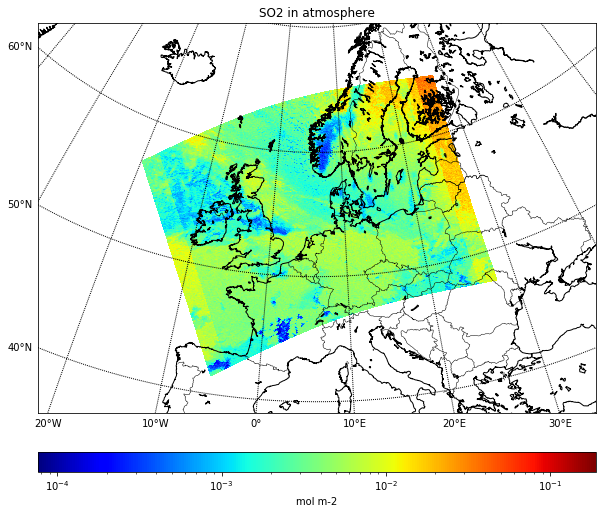

In [12]:
so2_unit = f.groups['PRODUCT'].variables['sulfurdioxide_total_vertical_column_precision'].units
rcParams['figure.figsize'] = 10,10
lon_0 = lon.mean()
lat_0 = lat.mean()
m = Basemap(width=5000000,height=3500000,resolution='i',projection='stere',lat_ts=40,lat_0=lat_0,lon_0=lon_0)
x, y = m(lon, lat)
cs = m.pcolor(x,y,np.squeeze(so2),norm=LogNorm(), cmap='jet')
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)
m.drawcoastlines()
m.drawstates()
m.drawcountries()
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(so2_unit)

plt.title('SO2 in atmosphere')
plt.show()